<h1 style="text-align:center;font-family:'Times New Roman';color:darkblue;font-weight:700;font-size:40px"> Covid-19 Data Warehousing Project </h1>

<hr style="border: 0.001px solid black">

<body>
    <p style ="font-weight:400;font-size:17px"><b> This Project demonstrates the complete process of creating Redshift datawarehouse for Covid-19 data which can be further expanded by using BI tools for Datavisualization and Dashboarding.</b></p>
  </body>

# The Process Architecture  👇

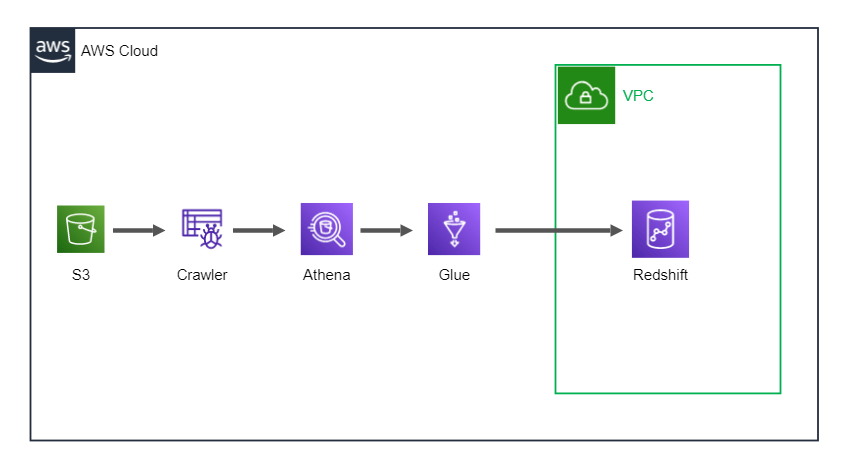

# Create an S3 bucket for the project 

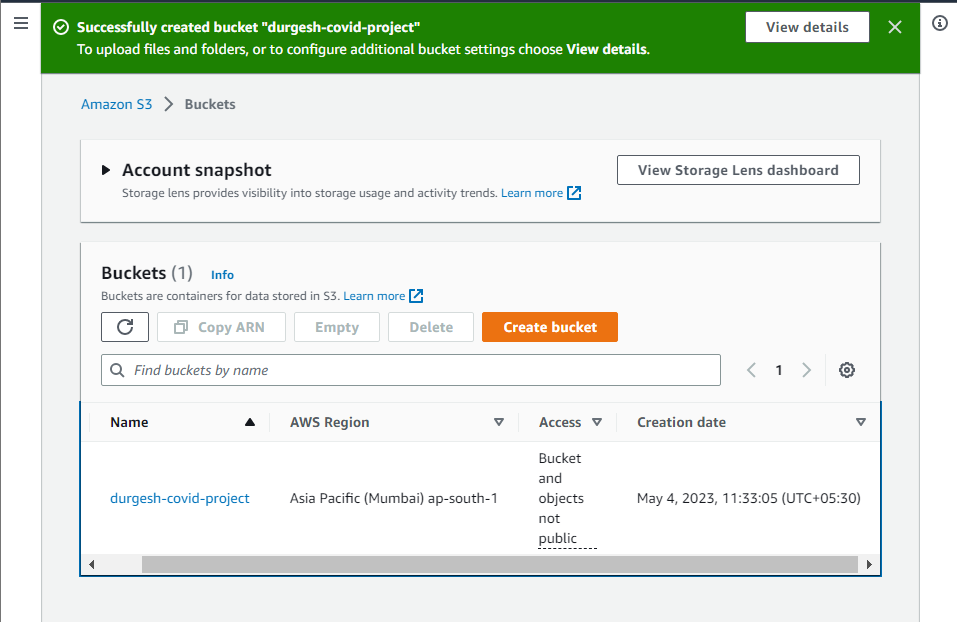

# Upload the Data to the bucket
### **data was taken from covid-19 data lake:** https://dj2taa9i652rf.cloudfront.net/

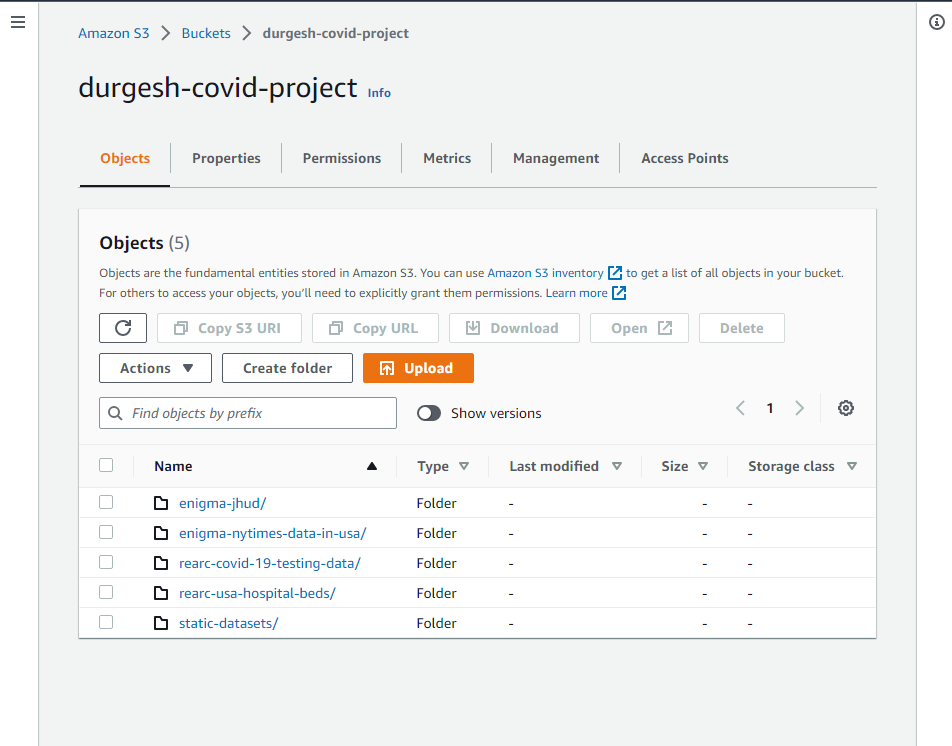

---

# Create IAM Role for Glue crawler

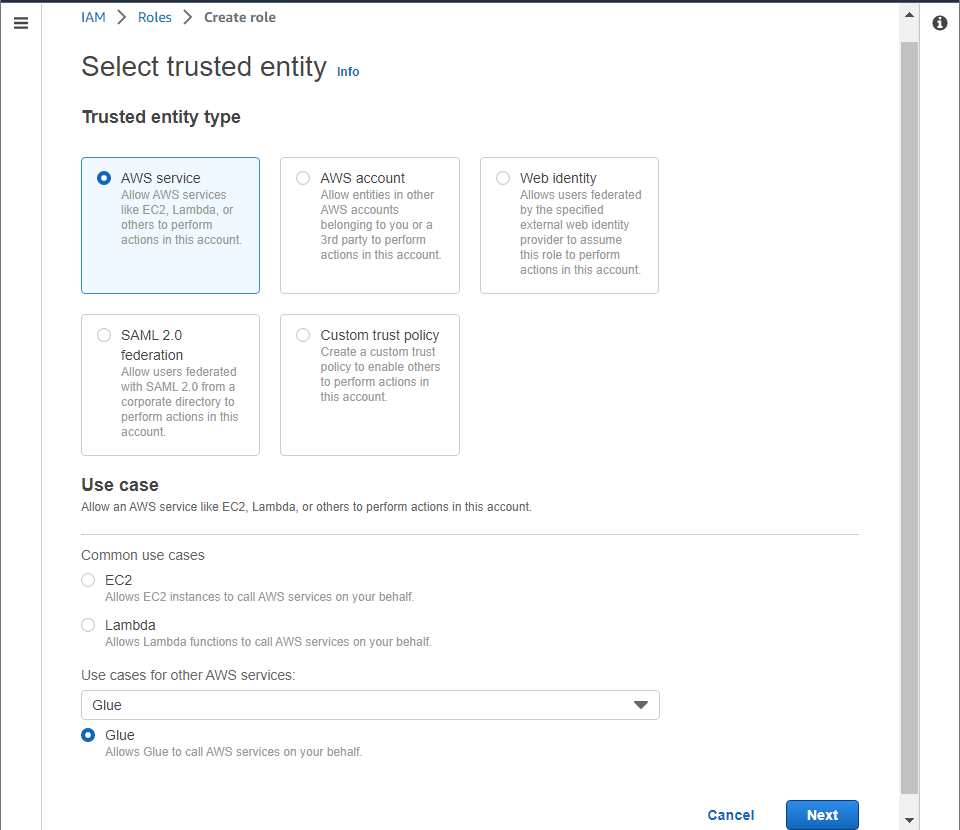

## **Below 👇image demonstrates the policies attached to the role**

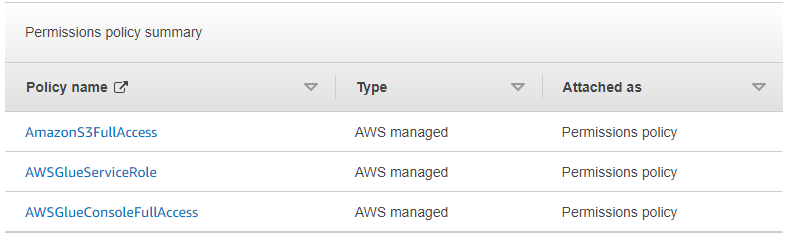

---

# Create Glue Crawlers for each dataset

## 1. Set crawlers Properties

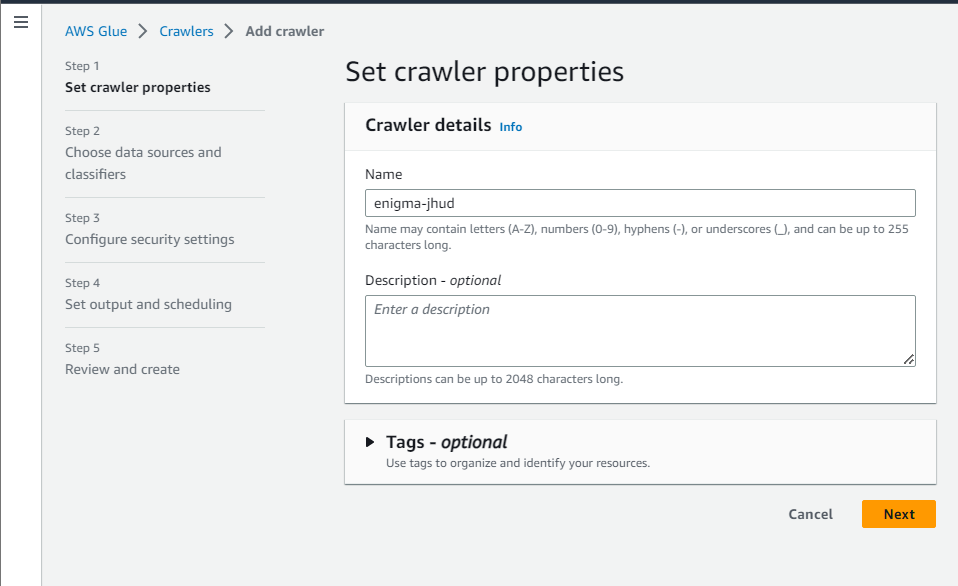

## 2. Add Data source 

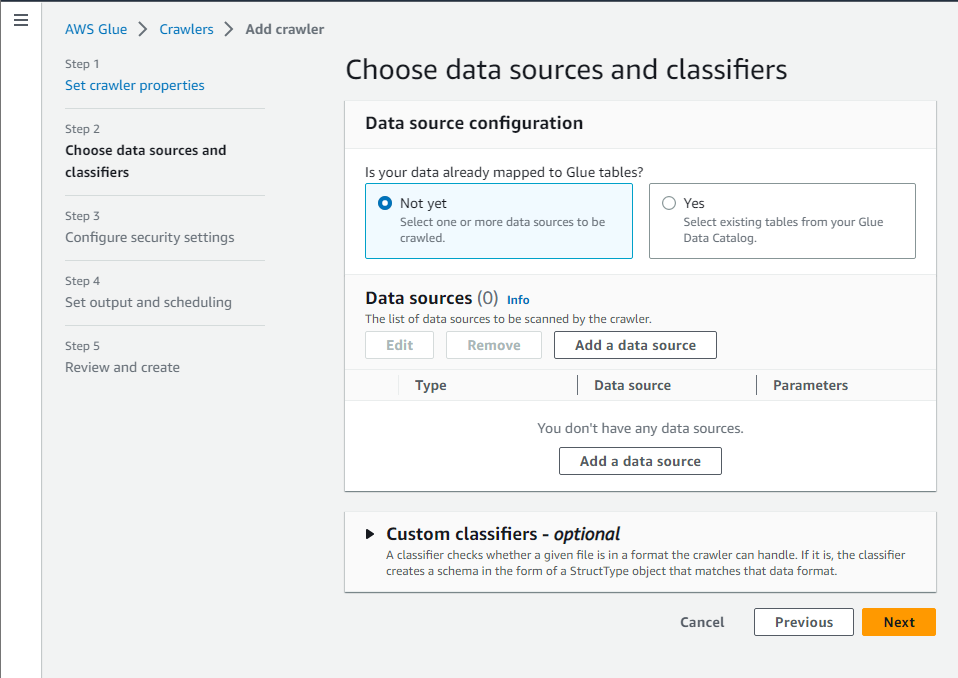

## Below 👇image demonstrates the selection of datasource for the dataset enigma-jhud
### *Note: choose the folder of the dataset not the dataset file*

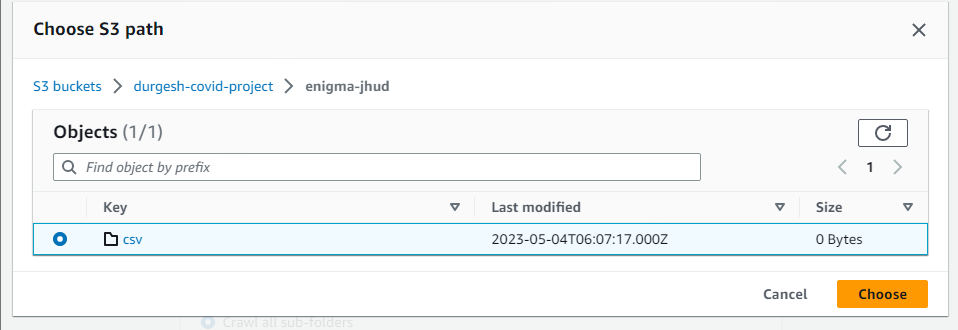

## 3. Choose the option crawl all the sub-folders in the Subsequent crawler runs

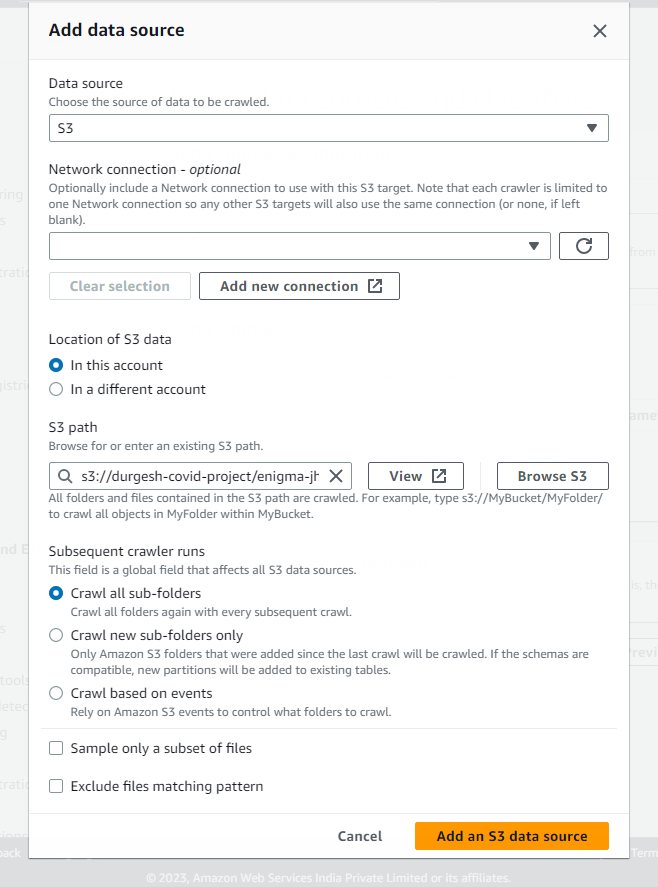

## 4. Configure the security settings and select IAM role you have created for Glue crawler

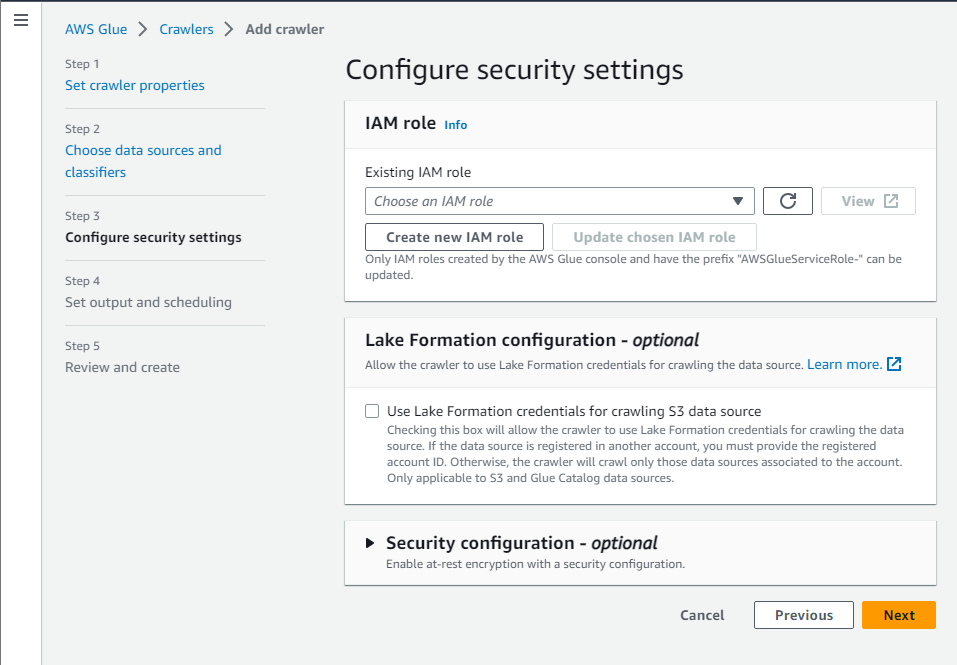

## Below image 👇 shows the IAM role attached

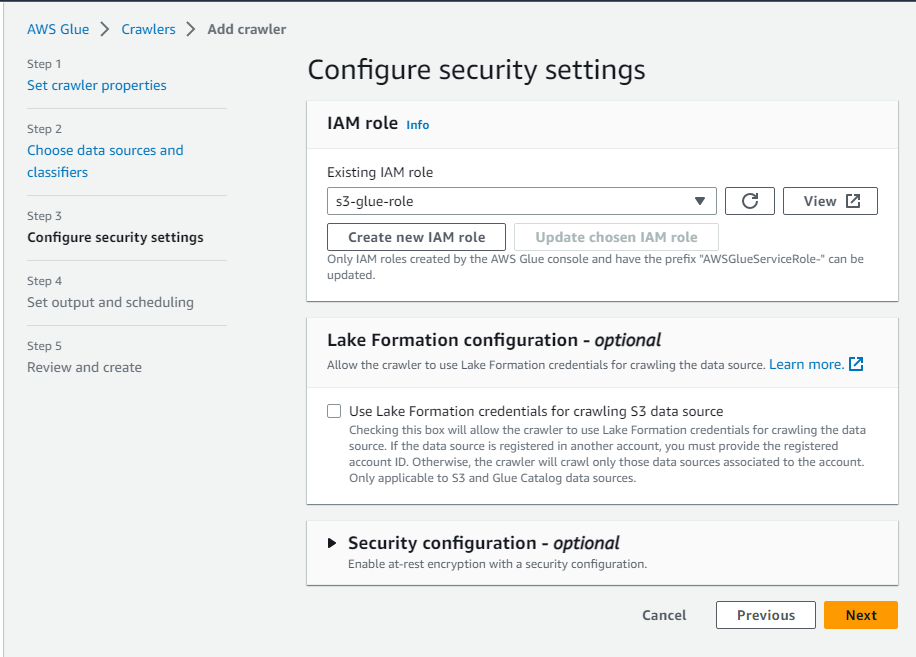

## 5. Choose option "Add database" to create database

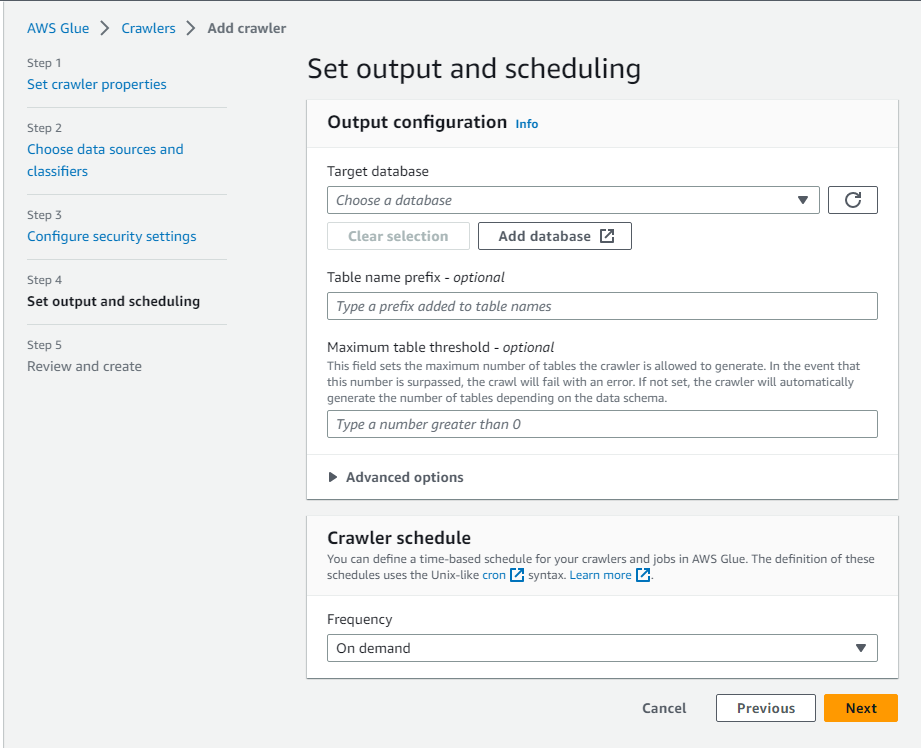

## Give the database name and choose option "Create database" 

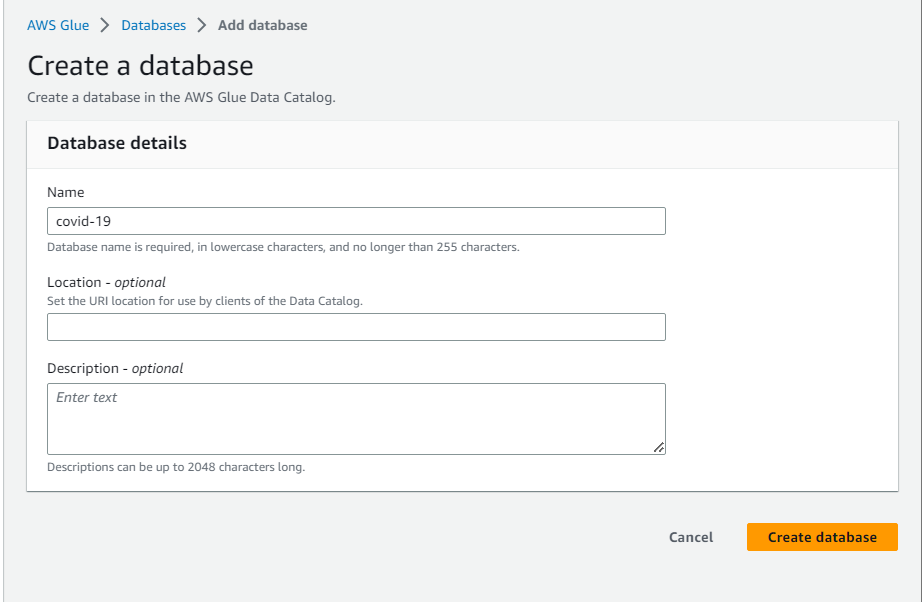

## 6. Choose option next and Create the crawler

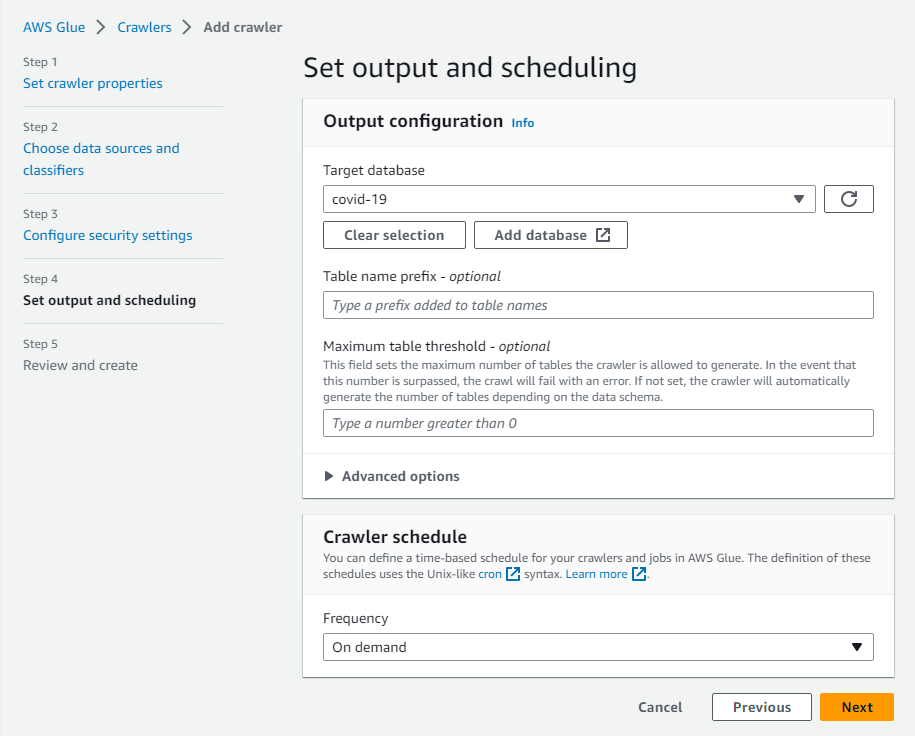

## 7. After successful creation run the crawler

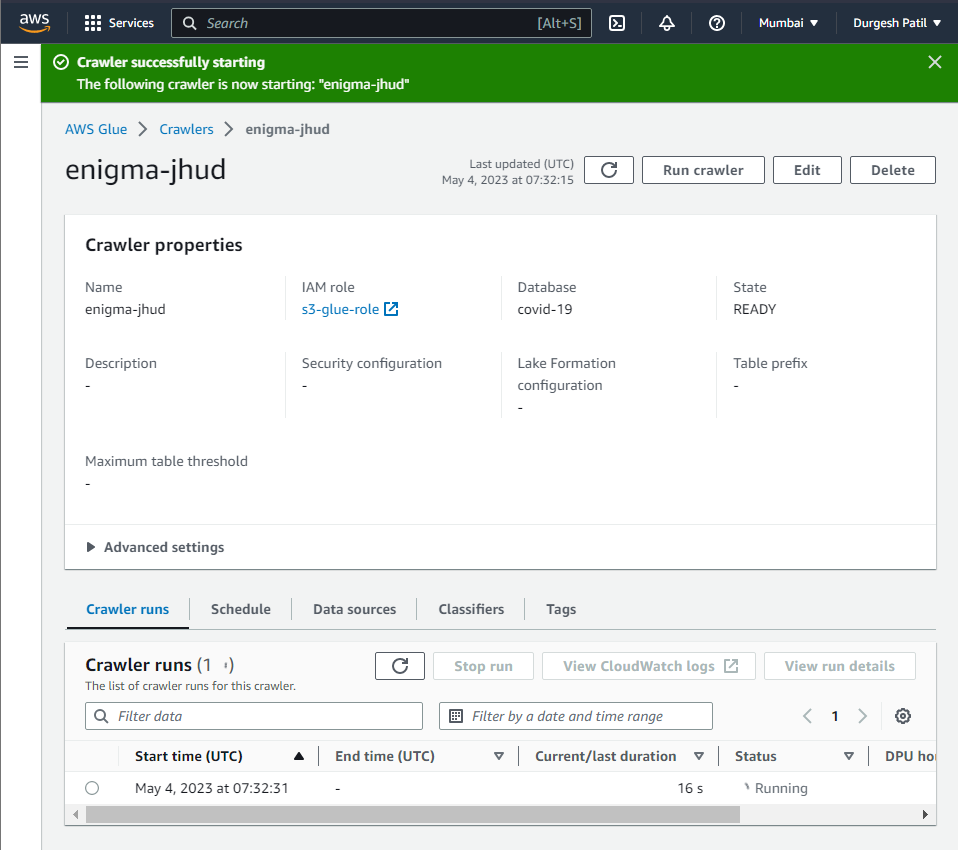

## Similarly create crawlers for all the datasets and run them

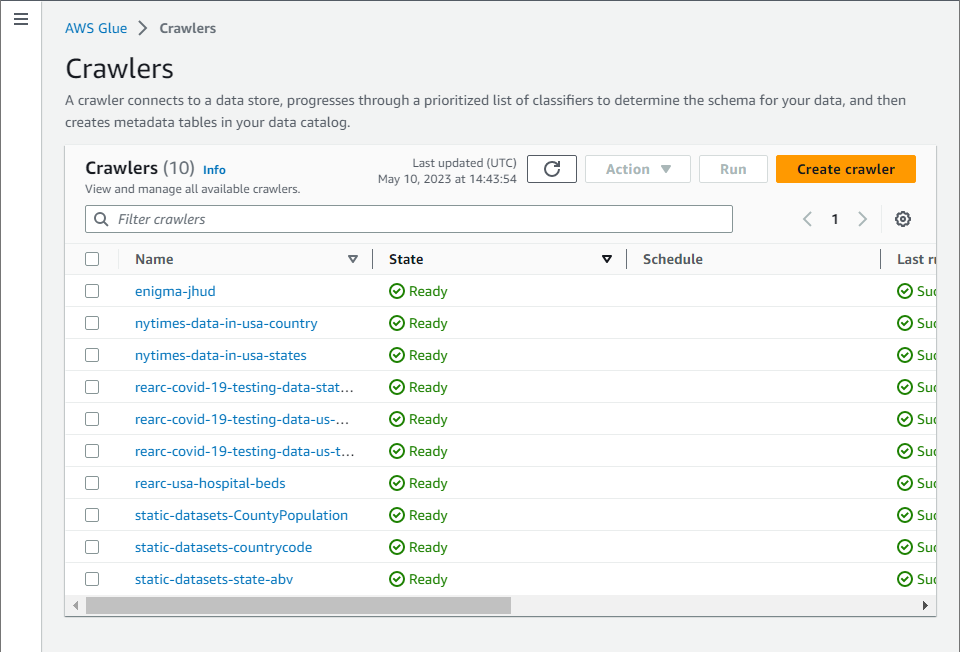

---

# Query datasets in athena
## • Go to Manage settings in query editor and add the location of S3 bucket you want to store the query results
###  *Note: You have to create a bucket to store the query result data as shown in the image and add create a folder named "output" for the query responses and "packages" for storing redshift-connector .whl library file later in it*

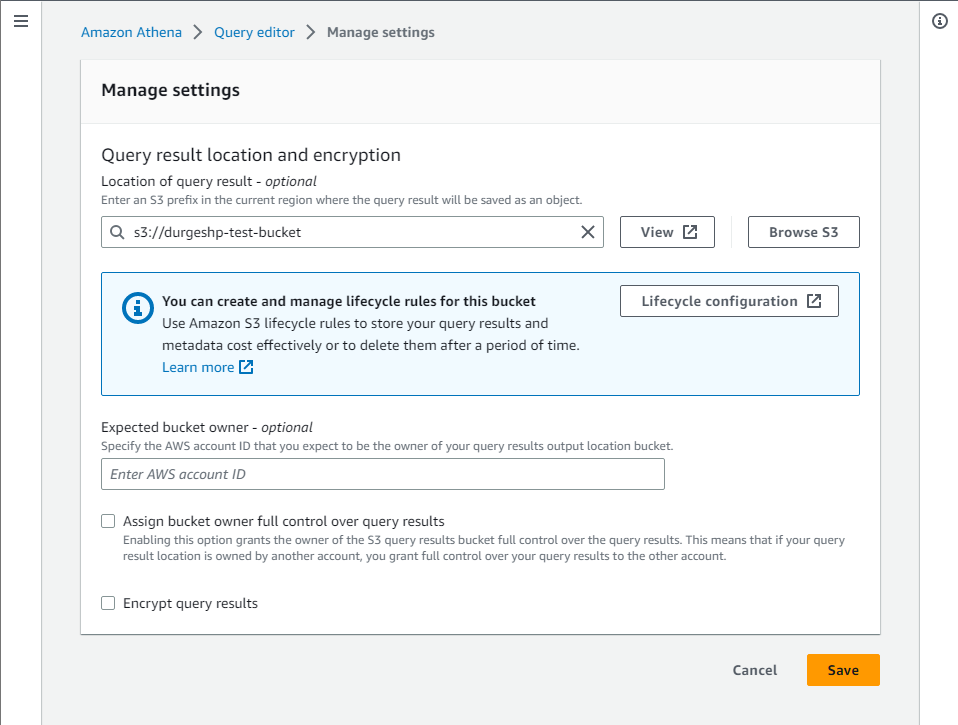

---

# Using boto3 to perform task through IDE

<span style ="font-weight:400;font-size:17px">
<body>
    <p>Boto3 is a Python package that allows you to interact with Amazon Web Services (AWS). AWS is a cloud platform that provides various services such as storage, computing, monitoring, etc. Boto3 lets you use Python code to access and manage these services. You can install Boto3 from pip installer, and configure your credentials and region. Boto3 supports many AWS services and has a comprehensive documentation.</p>
  </body>
</span>


In [16]:
import boto3
import pandas as pd
from io import StringIO

In [1]:
AWS_ACCESS_KEY = "Put your Iam User Access key here"
AWS_SECRET_KEY = "Put your Iam User secret Access key here"
# If no IAM user is created create an IAM user with Administrative access
# and get its access key ID & seccret access key
AWS_REGION = "ap-south-1"
SCHEMA_NAME = "covid-19"
S3_STAGING_DIR = "s3://durgeshp-test-bucket/output"
S3_BUCKET_NAME = "durgeshp-test-bucket"
S3_OUTPUT_DIRECTORY = "output"

## Create athena client

In [18]:
athena_client = boto3.client("athena",
                             aws_access_key_id = AWS_ACCESS_KEY,
                             aws_secret_access_key=AWS_SECRET_KEY,
                             region_name=AWS_REGION,
                             )

## Run the athena query👇

In [20]:
def athena_query(SqlQuery:str):

    query_response= athena_client.start_query_execution(
        QueryString= SqlQuery,

        ResultConfiguration={
            "OutputLocation": S3_STAGING_DIR,
            "EncryptionConfiguration":{"EncryptionOption": "SSE_S3"},
        },
    )
    return query_response
    

In [ ]:
query_response = athena_query('SELECT * FROM "covid-19"."enigma_jhud";')

<span style ="font-weight:400;font-size:17px">
<body>
    <p> • After running the query we get response in the dictionery form </p>
  </body>
</span>

In [ ]:
query_response

{'QueryExecutionId': '55a5db55-1265-42b1-b0d0-f1982b456571',
 'ResponseMetadata': {'RequestId': '2318ec13-0206-40a2-9e3b-d2da901a6c9e',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'date': 'Mon, 08 May 2023 11:52:43 GMT',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '59',
   'connection': 'keep-alive',
   'x-amzn-requestid': '2318ec13-0206-40a2-9e3b-d2da901a6c9e'},
  'RetryAttempts': 0}}

<span style ="font-weight:400;font-size:17px">
<body>
    <p>
    • The QueryExecutionId is used to locate file in S3
    </p>
  </body>
</span>

In [ ]:
query_response['QueryExecutionId']

'55a5db55-1265-42b1-b0d0-f1982b456571'

<span style ="font-weight:400;font-size:17px">
<body>
    <p> • Sample of how file query response file location and file name looks like in S3 bucket </p>
  </body>
</span>


In [ ]:
f"{S3_OUTPUT_DIRECTORY}/{query_response['QueryExecutionId']}.csv"

'output/55a5db55-1265-42b1-b0d0-f1982b456571.csv'

---

## Below 👇 code gets the athena query response (dataset) from the S3 bucket and stores it into the local file

In [19]:
def download_and_load_query_results(query_response:dict,file_name:str):

    temp_file_location: str =f"D:\AWS\de_project\{file_name}.csv"
    s3_client =boto3.client(
        "s3",
        aws_access_key_id = AWS_ACCESS_KEY,
        aws_secret_access_key = AWS_SECRET_KEY,
        region_name = AWS_REGION,
    )
    s3_client.download_file(
        S3_BUCKET_NAME,
        f"{S3_OUTPUT_DIRECTORY}/{query_response['QueryExecutionId']}.csv",
        temp_file_location,
    )
    return pd.read_csv(temp_file_location)

## Getting datasets from S3 bucket to the local file

### Dataset: Enigma_jhud

In [ ]:
enigma_jhud = download_and_load_query_results(query_response,"enigma_jhud")

In [ ]:
enigma_jhud.head()

,fips,admin2,province_state,country_region,last_update,latitude,longitude,confirmed,deaths,recovered,active,combined_key,partition_0
0,NaN,NaN,Anhui,China,2020-01-22T17:00:00,31.826,117.226,1.0,NaN,NaN,NaN,"""Anhui",csv
1,NaN,NaN,Beijing,China,2020-01-22T17:00:00,40.182,116.414,14.0,NaN,NaN,NaN,"""Beijing",csv
2,NaN,NaN,Chongqing,China,2020-01-22T17:00:00,30.057,107.874,6.0,NaN,NaN,NaN,"""Chongqing",csv
3,NaN,NaN,Fujian,China,2020-01-22T17:00:00,26.079,117.987,1.0,NaN,NaN,NaN,"""Fujian",csv
4,NaN,NaN,Gansu,China,2020-01-22T17:00:00,36.061,103.834,NaN,NaN,NaN,NaN,"""Gansu",csv


### Dataset:  nytimes-data-in-usa-country

In [79]:
query_response = athena_query('SELECT * FROM "covid-19"."nytimes-data-in-usa-countryus_county";')

In [80]:
nytimes_data_in_usa_country = download_and_load_query_results(query_response,"nytimes_data_in_usa_country")

In [81]:
nytimes_data_in_usa_country.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1.0,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1.0,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1.0,0.0
3,2020-01-24,Cook,Illinois,17031.0,1.0,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1.0,0.0


### Dataset: nytimes_data_in_usa_state

In [76]:
query_response = athena_query('SELECT * FROM "covid-19"."nytimes-data-in-usa-statesus_states";')

In [77]:
nytimes_data_in_usa_statesus_states = download_and_load_query_results(query_response,"nytimes_data_in_usa_states")

In [78]:
nytimes_data_in_usa_statesus_states.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### Dataset: rearc_covid_19_testing_data_states_daily

In [73]:
query_response = athena_query('SELECT * FROM "covid-19"."rearc-covid-19-testing-data-states-dailystates_daily";')


In [74]:
rearc_covid_19_testing_data_states_daily = download_and_load_query_results(query_response,"rearc_covid_19_testing_data_states_daily")

In [75]:
rearc_covid_19_testing_data_states_daily.head()

,date,state,positive,probablecases,negative,pending,totaltestresultssource,totaltestresults,hospitalizedcurrently,hospitalizedcumulative,...,dataqualitygrade,deathincrease,hospitalizedincrease,hash,commercialscore,negativeregularscore,negativescore,positivescore,score,grade
0,20210307,AK,56886,NaN,NaN,NaN,totalTestsViral,1731628,33.0,1293.0,...,NaN,0.0,0.0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0.0,0.0,0.0,0.0,0.0,NaN
1,20210307,AL,499819,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788,494.0,45976.0,...,NaN,-1.0,0.0,997207b430824ea40b8eb8506c19a93e07bc972e,0.0,0.0,0.0,0.0,0.0,NaN
2,20210307,AR,324818,69092.0,2480716.0,NaN,totalTestsViral,2736442,335.0,14926.0,...,NaN,22.0,11.0,50921aeefba3e30d31623aa495b47fb2ecc72fae,0.0,0.0,0.0,0.0,0.0,NaN
3,20210307,AS,0,NaN,2140.0,NaN,totalTestsViral,2140,NaN,NaN,...,NaN,0.0,0.0,96d23f888c995b9a7f3b4b864de6414f45c728ff,0.0,0.0,0.0,0.0,0.0,NaN
4,20210307,AZ,826454,56519.0,3073010.0,NaN,totalTestsViral,7908105,963.0,57907.0,...,NaN,5.0,44.0,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0.0,0.0,0.0,0.0,0.0,NaN


### Dataset: rearc-covid-19-testing-data-us-daily

In [65]:
query_response = athena_query('SELECT * FROM "covid-19"."rearc-covid-19-testing-data-us-dailyus_daily";')

In [66]:
rearc_covid_19_testing_data_us_daily = download_and_load_query_results(query_response,"rearc_covid_19_testing_data_us_daily")

In [67]:
rearc_covid_19_testing_data_us_daily.head()

,date,states,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,...,lastmodified,recovered,total,posneg,deathincrease,hospitalizedincrease,negativeincrease,positiveincrease,totaltestresultsincrease,hash
0,20210307,56,28755524.0,74579770.0,11808.0,40212.0,878613.0,8137.0,45475.0,2801.0,...,2021-03-07T24:00:00Z,NaN,0,0,839,726,130414,41265,1156241,8b26839690cd05c0cef69cb9ed85641a76b5e78e
1,20210306,56,28714259.0,74449356.0,11783.0,41401.0,877887.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1674,503,142201,59620,1409138,d0c0482ea549c9d5c04a7c86acb6fc6a8095a592
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,877384.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,a35ea4289cec4bb55c9f29ae04ec0fd5ac4e0222
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,874603.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,a19ad6379a653834cbda3093791ad2c3b9fab5ff
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,873073.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,9e1d2afda1b0ec243060d6f68a7134d011c0cb2a


### Dataset: rearc-covid-19-testing-data-us-total-latest

In [68]:
query_response = athena_query('SELECT * FROM "covid-19"."rearc-covid-19-testing-data-us-total-latestus_total_latest";')

In [69]:
rearc_covid_19_testing_data_us_totallatest = download_and_load_query_results(query_response,"rearc_covid_19_testing_data_us_totallatest")

In [70]:
rearc_covid_19_testing_data_us_totallatest.head()

,positive,negative,pending,hospitalizedcurrently,hospitalizedcumulative,inicucurrently,inicucumulative,onventilatorcurrently,onventilatorcumulative,recovered,hash,lastmodified,death,hospitalized,total,totaltestresults,posneg,notes
0,1061101,5170081,2775,53793,111955,9486,4192,4712,373,153947,95064ba29ccbc20dbec397033dfe4b1f45137c99,2020-05-01T09:12:31.891Z,57266,111955,6233957,6231182,6231182,"""NOTE: """"total"""""


### Dataset: rearc_usa_hospital_beds

In [49]:
query_response = athena_query('SELECT * FROM "covid-19"."rearc_usa_hospital_bedsrearc_usa_hospital_beds";')

In [50]:
rearc_usa_hospital_beds = download_and_load_query_results(query_response,"rearc_usa_hospital_beds")

In [51]:
rearc_usa_hospital_beds.head()

,objectid,hospital_name,hospital_type,hq_address,hq_address1,hq_city,hq_state,hq_zip_code,county_name,state_name,...,num_licensed_beds,num_staffed_beds,num_icu_beds,adult_icu_beds,pedi_icu_beds,bed_utilization,avg_ventilator_usage,potential_increase_in_bed_capac,latitude,longtitude
0,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,NaN,Phoenix,AZ,85012,Maricopa,Arizona,...,129.0,129.0,0,0,NaN,NaN,0.0,0,33.495498,-112.066157
1,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,NaN,Tucson,AZ,85723,Pima,Arizona,...,295.0,295.0,2,2,NaN,NaN,2.0,0,32.181263,-110.965885
2,3,VA Central California Health Care System,VA Hospital,2615 E Clinton Ave,NaN,Fresno,CA,93703,Fresno,California,...,57.0,57.0,2,2,NaN,NaN,2.0,0,36.773324,-119.779742
3,4,VA Connecticut Healthcare System - West Haven ...,VA Hospital,950 Campbell Ave,NaN,West Haven,CT,6516,New Haven,Connecticut,...,216.0,216.0,1,1,NaN,NaN,2.0,0,41.284400,-72.957610
4,5,Wilmington VA Medical Center,VA Hospital,1601 Kirkwood Hwy,NaN,Wilmington,DE,19805,New Castle,Delaware,...,60.0,60.0,0,0,NaN,NaN,1.0,0,39.740206,-75.606532


### Dataset: static-datasets-countrycode

In [37]:
query_response = athena_query('SELECT * FROM "covid-19"."static-datasets-countrycodecountrycode";')

In [41]:
static_datasets_countrycode = download_and_load_query_results(query_response,"static_datasets_countrycode")

In [43]:
static_datasets_countrycode.head()

,country,alpha-2 code,alpha-3 code,numeric code,latitude,longitude
0,Afghanistan,AF,AFG,4.0,33.0000,65.0
1,Albania,AL,ALB,8.0,41.0000,20.0
2,Algeria,DZ,DZA,12.0,28.0000,3.0
3,American Samoa,AS,ASM,16.0,-14.3333,-170.0
4,Andorra,AD,AND,20.0,42.5000,1.6


### Dataset: static_datasets_countypopulation

In [52]:
query_response = athena_query('SELECT * FROM "covid-19"."static_datasets_countypopulationcountypopulation";')

In [53]:
static_datasets_countypopulation = download_and_load_query_results(query_response,"static_datasets_countypopulation")

In [55]:
static_datasets_countypopulation.head()

,id,id2,county,state,population estimate 2018
0,0500000US01001,1001,Autauga,Alabama,55601
1,0500000US01003,1003,Baldwin,Alabama,218022
2,0500000US01005,1005,Barbour,Alabama,24881
3,0500000US01007,1007,Bibb,Alabama,22400
4,0500000US01009,1009,Blount,Alabama,57840


### Dataset: static-datasets-state-abvstate_abv

In [56]:
query_response = athena_query('SELECT * FROM "covid-19"."static-datasets-state-abvstate_abv";')

In [57]:
state_abvstate_abv = download_and_load_query_results(query_response,"state_abvstate_abv")

In [85]:
state_abvstate_abv.head()

,State,Abbreviation
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR
5,California,CA


In [84]:
new_header = state_abvstate_abv.iloc[0]
state_abvstate_abv = state_abvstate_abv[1:]
state_abvstate_abv.columns = new_header
state_abvstate_abv.head()
state_abvstate_abv.to_csv("state_abvstate_abv",index=False)

,State,Abbreviation
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR
5,California,CA


---

# Create Data model from the datasets

<span style ="font-weight:400;font-size:17px">
<body>
    <p><b> A data model is an abstract model that organizes elements of data and standardizes how they relate to one another and to the properties of real-world entities. It describes the structure, manipulation, and integrity aspects of the data stored in data management systems such as relational databases.</b></p>
  </body>
</span>

---

# Create Dimensional model from the datasets

<span style ="font-weight:400;font-size:17px">
<body>
    <p><b> Dimensional model is a data structure technique optimized for data storage in a Data warehouse. The purpose of dimensional modeling is to optimize the database for faster retrieval of data. Each dimensional model consists of many fact tables, with each fact table joined with corresponding dimension tables.</b></p>
  </body>
</span>

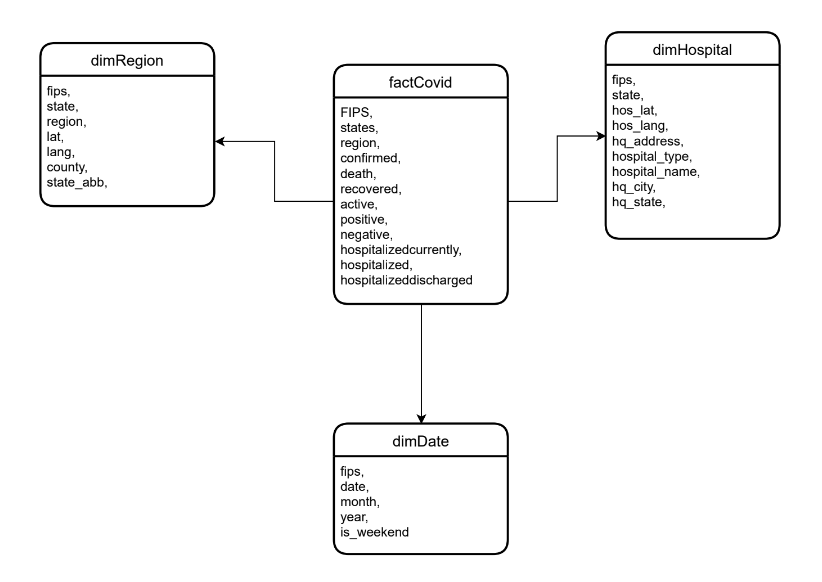

---

# Create datasets according to the dimensional model

In [15]:
factcovid_1 = enigma_jhud[['fips','province_state','country_region',
                           'confirmed', 'deaths', 'recovered', 'active',
                           ]]
factcovid_2 = rearc_covid_19_testing_data_states_daily[['fips','date','positive','negative','hospitalizedcurrently','hospitalized','hospitalizeddischarged',]]
factCovid = pd.merge(factcovid_1,factcovid_2,on='fips',how='inner')

In [16]:
factCovid.head()

,fips,province_state,country_region,confirmed,deaths,recovered,active,date,positive,negative,hospitalizedcurrently,hospitalized,hospitalizeddischarged
0,NaN,Anhui,China,1.0,NaN,NaN,NaN,20210119,289939,NaN,1066.0,NaN,NaN
1,NaN,Beijing,China,14.0,NaN,NaN,NaN,20210119,289939,NaN,1066.0,NaN,NaN
2,NaN,Chongqing,China,6.0,NaN,NaN,NaN,20210119,289939,NaN,1066.0,NaN,NaN
3,NaN,Fujian,China,1.0,NaN,NaN,NaN,20210119,289939,NaN,1066.0,NaN,NaN
4,NaN,Gansu,China,NaN,NaN,NaN,NaN,20210119,289939,NaN,1066.0,NaN,NaN


In [17]:
factCovid.shape

(27992, 13)

### • Schema for table factCovid

In [18]:
factCovidsql = pd.io.sql.get_schema(factCovid.reset_index(),'factCovid')
print(''.join(factCovidsql))

CREATE TABLE "factCovid" (
"index" INTEGER,
  "fips" REAL,
  "province_state" TEXT,
  "country_region" TEXT,
  "confirmed" REAL,
  "deaths" REAL,
  "recovered" REAL,
  "active" REAL,
  "date" INTEGER,
  "positive" INTEGER,
  "negative" REAL,
  "hospitalizedcurrently" REAL,
  "hospitalized" REAL,
  "hospitalizeddischarged" REAL
)


In [11]:
dimRegion_1 = enigma_jhud[['fips','province_state','country_region','latitude', 'longitude',]]
dimRegion_2 = nytimes_data_in_usa_country[['fips','county','state']]
dimRegion = pd.merge(dimRegion_1,dimRegion_2,on='fips',how='inner')

In [13]:
dimRegion.head()

,fips,province_state,country_region,latitude,longitude,county,state
0,NaN,Anhui,China,31.826,117.226,New York City,New York
1,NaN,Anhui,China,31.826,117.226,Unknown,Rhode Island
2,NaN,Anhui,China,31.826,117.226,New York City,New York
3,NaN,Anhui,China,31.826,117.226,Unknown,Rhode Island
4,NaN,Anhui,China,31.826,117.226,New York City,New York


In [12]:
dimRegion.shape

(11752274, 7)

### • Schema for table dimRegion

In [14]:
dimRegionsql = pd.io.sql.get_schema(dimRegion.reset_index(),'dimRegion')
print(''.join(dimRegionsql))

CREATE TABLE "dimRegion" (
"index" INTEGER,
  "fips" REAL,
  "province_state" TEXT,
  "country_region" TEXT,
  "latitude" REAL,
  "longitude" REAL,
  "county" TEXT,
  "state" TEXT
)


In [20]:
dimHospital=rearc_usa_hospital_beds[['fips','state_name','latitude','longtitude','hq_address','hospital_name','hospital_type','hq_city','hq_state']]

In [21]:
dimHospital.head()

,fips,state_name,latitude,longtitude,hq_address,hospital_name,hospital_type,hq_city,hq_state
0,4013.0,Arizona,33.495498,-112.066157,650 E Indian School Rd,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,Phoenix,AZ
1,4019.0,Arizona,32.181263,-110.965885,3601 S 6th Ave,Southern Arizona VA Health Care System,VA Hospital,Tucson,AZ
2,6019.0,California,36.773324,-119.779742,2615 E Clinton Ave,VA Central California Health Care System,VA Hospital,Fresno,CA
3,9009.0,Connecticut,41.284400,-72.957610,950 Campbell Ave,VA Connecticut Healthcare System - West Haven ...,VA Hospital,West Haven,CT
4,10003.0,Delaware,39.740206,-75.606532,1601 Kirkwood Hwy,Wilmington VA Medical Center,VA Hospital,Wilmington,DE


In [22]:
dimHospital.shape

(6637, 9)

### • Schema for table dimHospital

In [23]:
dimHospitalsql = pd.io.sql.get_schema(dimHospital.reset_index(),'dimHospital')
print(''.join(dimHospitalsql))

CREATE TABLE "dimHospital" (
"index" INTEGER,
  "fips" REAL,
  "state_name" TEXT,
  "latitude" REAL,
  "longtitude" REAL,
  "hq_address" TEXT,
  "hospital_name" TEXT,
  "hospital_type" TEXT,
  "hq_city" TEXT,
  "hq_state" TEXT
)


In [2]:
dimDate = rearc_covid_19_testing_data_states_daily[['fips','date']]

In [3]:
dimDate.head()

,fips,date
0,2.0,20210307
1,1.0,20210307
2,5.0,20210307
3,60.0,20210307
4,4.0,20210307


In [4]:
dimDate.shape

(2685, 2)

In [5]:
dimDate['date']=pd.to_datetime(dimDate['date'],format='%Y%m%d')

C:\Users\Durgesh patil\AppData\Local\Temp\ipykernel_19020\4062609722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimDate['date']=pd.to_datetime(dimDate['date'],format='%Y%m%d')


In [6]:
dimDate.head()

,fips,date
0,2.0,2021-03-07
1,1.0,2021-03-07
2,5.0,2021-03-07
3,60.0,2021-03-07
4,4.0,2021-03-07


In [7]:
dimDate['year'] = dimDate['date'].dt.year
dimDate['month'] = dimDate['date'].dt.month
dimDate['day_of_week'] = dimDate['date'].dt.dayofweek

C:\Users\Durgesh patil\AppData\Local\Temp\ipykernel_19020\935310350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimDate['year'] = dimDate['date'].dt.year
C:\Users\Durgesh patil\AppData\Local\Temp\ipykernel_19020\935310350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimDate['month'] = dimDate['date'].dt.month
C:\Users\Durgesh patil\AppData\Local\Temp\ipykernel_19020\935310350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [8]:
dimDate.head()

,fips,date,year,month,day_of_week
0,2.0,2021-03-07,2021,3,6
1,1.0,2021-03-07,2021,3,6
2,5.0,2021-03-07,2021,3,6
3,60.0,2021-03-07,2021,3,6
4,4.0,2021-03-07,2021,3,6


### • Schema for the dimDate table

In [9]:
dimDatesql = pd.io.sql.get_schema(dimDate.reset_index(),'dimDate')
print(''.join(dimDatesql))

CREATE TABLE "dimDate" (
"index" INTEGER,
  "fips" REAL,
  "date" TIMESTAMP,
  "year" INTEGER,
  "month" INTEGER,
  "day_of_week" INTEGER
)


In [139]:
bucket = 'durgesh-covid-project'#Already created in S3

In [145]:
s3_client =boto3.client(
        "s3",
        aws_access_key_id = AWS_ACCESS_KEY,
        aws_secret_access_key = AWS_SECRET_KEY,
        region_name = AWS_REGION,
    )

In [149]:
csv_buffer = StringIO()
factCovid.to_csv(csv_buffer)
s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key='output/factCovid.csv')

{'ResponseMetadata': {'RequestId': '5PBDVZ2GV9DMAF4Q',
  'HostId': 'b8WWNJ67ig9IyfMSXfz/QGovMeDPxBNIIo87PyWdB1MyXkNRb6XLJQY0URjVC4D5eOPckbxHE4DV1bCwdMJ2rQ==',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'b8WWNJ67ig9IyfMSXfz/QGovMeDPxBNIIo87PyWdB1MyXkNRb6XLJQY0URjVC4D5eOPckbxHE4DV1bCwdMJ2rQ==',
   'x-amz-request-id': '5PBDVZ2GV9DMAF4Q',
   'date': 'Mon, 08 May 2023 18:46:17 GMT',
   'x-amz-version-id': '17oSOSl722ZV_RAFHm9LG5JpqoPhj1Cx',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"fc9be4f5fc50864df1f4ed534cf29988"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"fc9be4f5fc50864df1f4ed534cf29988"',
 'ServerSideEncryption': 'AES256',
 'VersionId': '17oSOSl722ZV_RAFHm9LG5JpqoPhj1Cx'}

In [155]:
csv_buffer = StringIO()
dimRegion.to_csv(csv_buffer)
s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key='output/dimRegion.csv')

{'ResponseMetadata': {'RequestId': 'FYR6NHKNZT82067Q',
  'HostId': 'cYQOcBt7GOXDNcywH5MsCUxkGj7/cAGqYEEguY/hUDPTFCoBYvnfJgeKpYua7mhBei24tUHs9Wg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'cYQOcBt7GOXDNcywH5MsCUxkGj7/cAGqYEEguY/hUDPTFCoBYvnfJgeKpYua7mhBei24tUHs9Wg=',
   'x-amz-request-id': 'FYR6NHKNZT82067Q',
   'date': 'Mon, 08 May 2023 18:57:32 GMT',
   'x-amz-version-id': 'jEEwpk7n174NSeUN_.gK8P9p0hRSvqhJ',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"2fdf65265c31f0f6e8c02b4bd066d670"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"2fdf65265c31f0f6e8c02b4bd066d670"',
 'ServerSideEncryption': 'AES256',
 'VersionId': 'jEEwpk7n174NSeUN_.gK8P9p0hRSvqhJ'}

In [153]:
csv_buffer = StringIO()
dimHospital.to_csv(csv_buffer)
s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key='output/dimHospital.csv')

{'ResponseMetadata': {'RequestId': 'G19Q0FMH1T83GVM9',
  'HostId': '8gjGOKxCxNcbE54ausule1oBvlSJANlu4HzpetQcbRWcj3RCn32b45dvwjWmS7JCW5lL2CXBDFY=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '8gjGOKxCxNcbE54ausule1oBvlSJANlu4HzpetQcbRWcj3RCn32b45dvwjWmS7JCW5lL2CXBDFY=',
   'x-amz-request-id': 'G19Q0FMH1T83GVM9',
   'date': 'Mon, 08 May 2023 18:56:00 GMT',
   'x-amz-version-id': '4MgQplRT6wYyQ4.OhOR4tyCh_pidkds.',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"a26c4e35d128fe6f64955ba9aac1d221"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"a26c4e35d128fe6f64955ba9aac1d221"',
 'ServerSideEncryption': 'AES256',
 'VersionId': '4MgQplRT6wYyQ4.OhOR4tyCh_pidkds.'}

In [154]:
csv_buffer = StringIO()
dimDate.to_csv(csv_buffer)
s3_client.put_object(Body=csv_buffer.getvalue(), Bucket=bucket, Key='output/dimDate.csv')

{'ResponseMetadata': {'RequestId': 'TFBZJ33FBSZ8C4MZ',
  'HostId': 'Zzr1eWbEk7MxfS8z16zpvckVav83Q+m4oKaeXHP1skLupv2I6i/LhJKh61MVcUKeXsMgMbLgrkM=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Zzr1eWbEk7MxfS8z16zpvckVav83Q+m4oKaeXHP1skLupv2I6i/LhJKh61MVcUKeXsMgMbLgrkM=',
   'x-amz-request-id': 'TFBZJ33FBSZ8C4MZ',
   'date': 'Mon, 08 May 2023 18:56:43 GMT',
   'x-amz-version-id': 'rimJk6e4kj3WXDeuQ1OJRYPf8cAVsLzz',
   'x-amz-server-side-encryption': 'AES256',
   'etag': '"19eb0b77e7f7441c686829bc3fd1a906"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"19eb0b77e7f7441c686829bc3fd1a906"',
 'ServerSideEncryption': 'AES256',
 'VersionId': 'rimJk6e4kj3WXDeuQ1OJRYPf8cAVsLzz'}

# Configuration of Cluster 👇

In [6]:
DWH_CLUSTER_TYPE = "single-node"
DWH_NUM_NODES = "1"
DWH_NODE_TYPE = "dc2.large"
DWH_CLUSTER_IDENTIFIER="covidproject"
DWH_DB="flight"
DWH_DB_USER = "durgesh"
DWH_DB_PASSWORD = "Password123"
DWH_PORT = "5439"
DWH_IAM_ROLE_NAME = "redshift_s3_access"
DWH_DB_NAME ="covid-db"

### • Creating variables storing boto3.client for redshift & Iam 

In [24]:
redshift_client = boto3.client("redshift",
                             aws_access_key_id = AWS_ACCESS_KEY,
                             aws_secret_access_key=AWS_SECRET_KEY,
                             region_name=AWS_REGION,
                             )

In [17]:
iam_client = boto3.client("iam",
                             aws_access_key_id = AWS_ACCESS_KEY,
                             aws_secret_access_key=AWS_SECRET_KEY,
                             region_name=AWS_REGION,
                             )

### • Creating variable storing boto3.resource for ec2

In [44]:
ec2_resource = boto3.resource("ec2",
                          aws_access_key_id = AWS_ACCESS_KEY,
                          aws_secret_access_key=AWS_SECRET_KEY,
                          region_name=AWS_REGION,
                          )

In [18]:
roleArn = iam_client.get_role(RoleName=DWH_IAM_ROLE_NAME)['Role']['Arn']

In [19]:
roleArn

'arn:aws:iam::436117849909:role/redshift_s3_access'

## Create Redshift Cluster

In [20]:

redshift_response = redshift_client.create_cluster(
    ClusterIdentifier = DWH_CLUSTER_IDENTIFIER,
    NodeType = DWH_NODE_TYPE,
    MasterUsername = DWH_DB_USER,
    MasterUserPassword= DWH_DB_PASSWORD,
    ClusterType = DWH_CLUSTER_TYPE,
    DBName = DWH_DB_NAME,
    
    #Role for S3 access
    IamRoles = [roleArn]
)


<span style ="font-weight:400;font-size:17px">
<body>
    <p> • Below response shows the configuration of the cluster created </p>
  </body>
</span>


In [ ]:
redshift_response

{'Cluster': {'ClusterIdentifier': 'covidproject',
  'NodeType': 'dc2.large',
  'ClusterStatus': 'creating',
  'ClusterAvailabilityStatus': 'Modifying',
  'MasterUsername': 'durgesh',
  'DBName': 'covid-db',
  'AutomatedSnapshotRetentionPeriod': 1,
  'ManualSnapshotRetentionPeriod': -1,
  'ClusterSecurityGroups': [],
  'VpcSecurityGroups': [{'VpcSecurityGroupId': 'sg-0a1c0b3f4a736fcba',
    'Status': 'active'}],
  'ClusterParameterGroups': [{'ParameterGroupName': 'default.redshift-1.0',
    'ParameterApplyStatus': 'in-sync'}],
  'ClusterSubnetGroupName': 'default',
  'VpcId': 'vpc-09eadb7f91dfac446',
  'PreferredMaintenanceWindow': 'sat:07:30-sat:08:00',
  'PendingModifiedValues': {'MasterUserPassword': '****'},
  'ClusterVersion': '1.0',
  'AllowVersionUpgrade': True,
  'NumberOfNodes': 1,
  'PubliclyAccessible': True,
  'Encrypted': False,
  'Tags': [],
  'EnhancedVpcRouting': False,
  'IamRoles': [{'IamRoleArn': 'arn:aws:iam::436117849909:role/redshift_s3_access',
    'ApplyStatus': 

<span style ="font-weight:400;font-size:17px">
<body>
    <p><b> • Go to redshift to verify the creation of the cluster</b></p>
  </body>
</span>

## • Changing Security Group Configuration

In [30]:
VpcId = redshift_response['Cluster']['VpcId']

In [47]:
vpc = ec2_resource.Vpc(id = VpcId)
defaultSg = list(vpc.security_groups.all())[0]
defaultSg.authorize_ingress(
    GroupName=defaultSg.group_name,
    CidrIp='0.0.0.0/0',
    IpProtocol='TCP',
    FromPort = int(DWH_PORT),
    ToPort = int(DWH_PORT)
)

{'Return': True,
 'SecurityGroupRules': [{'SecurityGroupRuleId': 'sgr-01a04994cce442209',
   'GroupId': 'sg-0a1c0b3f4a736fcba',
   'GroupOwnerId': '436117849909',
   'IsEgress': False,
   'IpProtocol': 'tcp',
   'FromPort': 5439,
   'ToPort': 5439,
   'CidrIpv4': '0.0.0.0/0'}],
 'ResponseMetadata': {'RequestId': '5633f270-1f90-4888-8094-75bcd4fd8e5c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5633f270-1f90-4888-8094-75bcd4fd8e5c',
   'cache-control': 'no-cache, no-store',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'content-type': 'text/xml;charset=UTF-8',
   'content-length': '723',
   'date': 'Tue, 09 May 2023 07:47:38 GMT',
   'server': 'AmazonEC2'},
  'RetryAttempts': 0}}

<span style ="font-weight:400;font-size:17px">
<body>
    <p><b> • Go to redshift console and check inside the properties section there you will find Security group option, check whether it is updated.</b></p>
  </body>
</span>

---

# Script for making tables into Redshift 👇

## 1.  Use Redshift connector library to connect to the redshift cluster

In [ ]:
import redshift_connector

conn = redshift_connector.connect(
        host='covidproject.cyic4klygty9.ap-south-1.redshift.amazonaws.com',
        database='covid-db',
        user='durgesh',
        password='Password123'
     )

conn.autocommit = True
cursor= redshift_connector.Cursor = conn.cursor()


## 2. Create tables into the Redshift datawarehouse

In [ ]:

cursor.execute("""
CREATE TABLE "factCovid" (
"index" INTEGER,
"fips" REAL,
"province_state" TEXT,
"country_region" TEXT,
"confirmed" REAL ,
"deaths" REAL,
"recovered" REAL,
"active" REAL,
"date" INTEGER,
"positive" REAL,
"negative" REAL,
"hospitalizedcurrently" REAL,
"hospitalized" REAL,
"hospitalizeddischarged" REAL
)
""")

cursor.execute("""
CREATE TABLE "dimHospital" (
"index" INTEGER,
"fips" REAL,
"state_name" TEXT,
"latitude" REAL,
"longtitude" REAL,
"hq_address" TEXT,
"hospital_type" TEXT,
"hospital_name" TEXT,
"hq_city" TEXT,
"hq_state" TEXT
)
""")

cursor.execute("""
CREATE TABLE "dimRegion" (
"index" INTEGER,
  "fips" REAL,
  "province_state" TEXT,
  "country_region" TEXT,
  "latitude" REAL,
  "longitude" REAL,
  "county" TEXT,
  "state" TEXT
)
""")

cursor.execute("""
CREATE TABLE "dimDate" (
"index" INTEGER,
  "fips" REAL,
  "date" TIMESTAMP,
  "year" INTEGER,
  "month" INTEGER,
  "day_of_week" INTEGER
)
""")


### 3. Copy data form S3 to the tables

In [ ]:
cursor.execute(""" 
copy factCovid from 's3://durgesh-covid-project/output/factCovid.csv'
credentials 'aws_iam_role=arn:aws:iam::436117849909:role/redshift_s3_access'
delimiter ','
region 'ap-south-1'
IGNOREHEADER 1
""")

cursor.execute(""" 
copy dimHospital from 's3://durgesh-covid-project/output/dimHospital.csv'
credentials 'aws_iam_role=arn:aws:iam::436117849909:role/redshift_s3_access'
delimiter ','
region 'ap-south-1'
IGNOREHEADER 1
""")

cursor.execute(""" 
copy dimRegion from 's3://durgesh-covid-project/output/dimRegion.csv'
credentials 'aws_iam_role=arn:aws:iam::436117849909:role/redshift_s3_access'
delimiter ','
region 'ap-south-1'
IGNOREHEADER 1
""")

cursor.execute(""" 
copy dimDate from 's3://durgesh-covid-project/output/dimDate.csv'
credentials 'aws_iam_role=arn:aws:iam::436117849909:role/redshift_s3_access'
delimiter ','
region 'ap-south-1'
IGNOREHEADER 1
""")

---

# Download the .whl file for redshift-connector from 
### https://pypi.org/project/redshift-connector/2.0.389/

<span style ="font-weight:400;font-size:17px">
<body>
    <p><b> • Upload this file to the packages folder in your S3 bucket, where you are storing query responses .</b></p>
  </body>
</span> 

# Create Glue Jobs to run the Script

## • Create job with Python Shell script editor

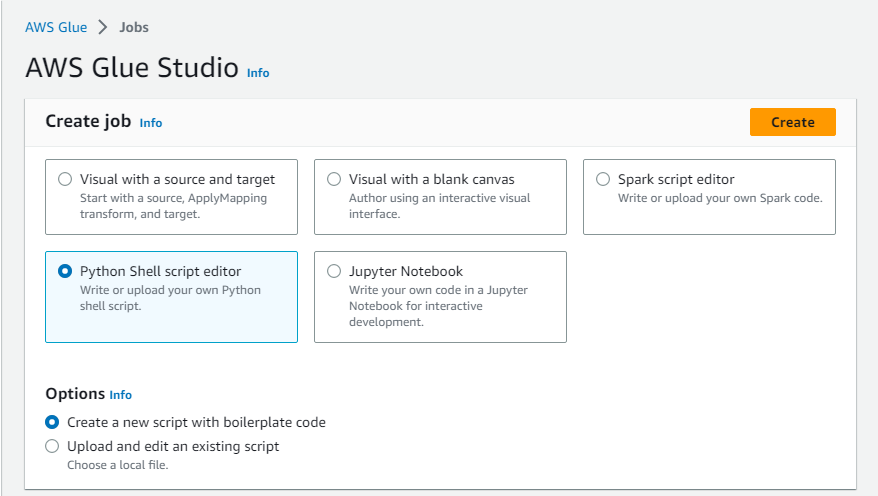

## • Enter the location/URI of the libraryfile Glue job will use this library to perform code operations.

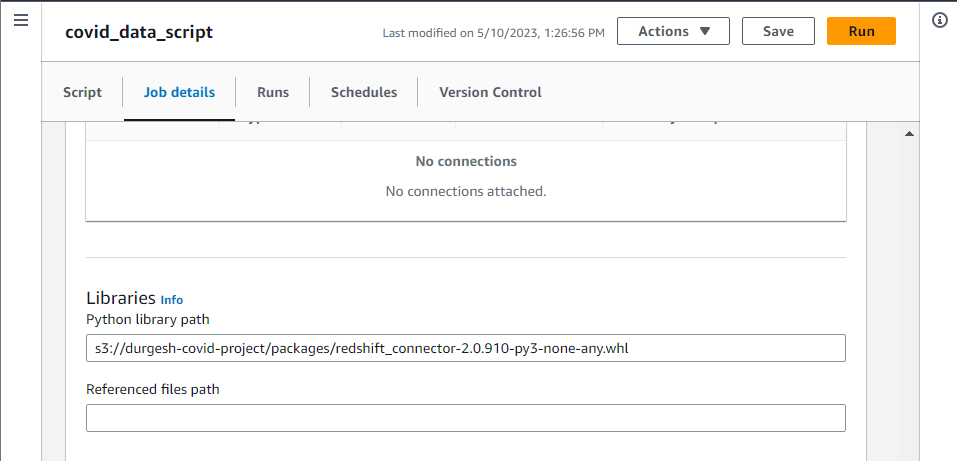

## • Save and Run the Script

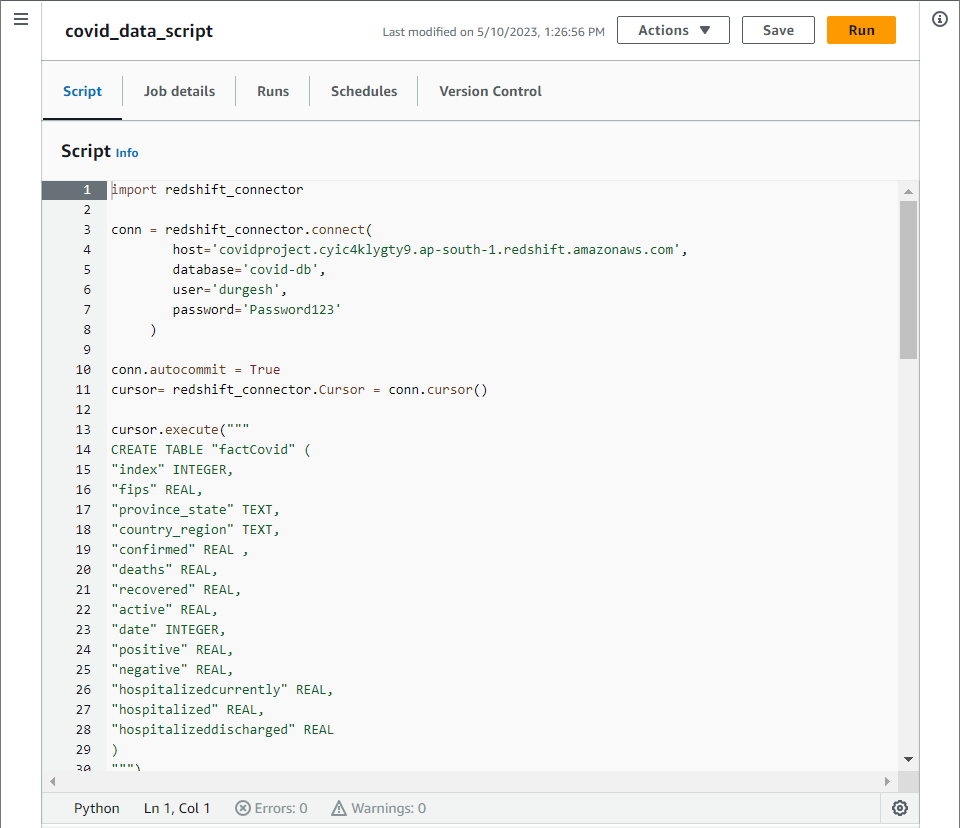

## After successful Run you will see below 👇 result

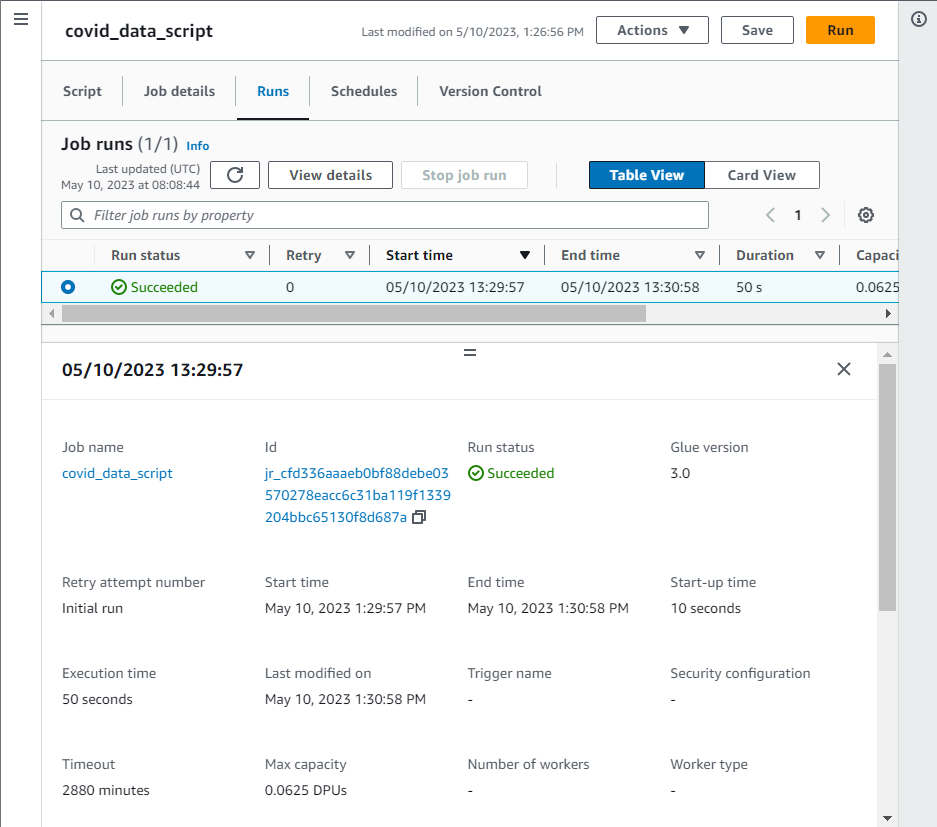

## Below Image shows the query is successful in creating the tables inside the Redshift cluster database

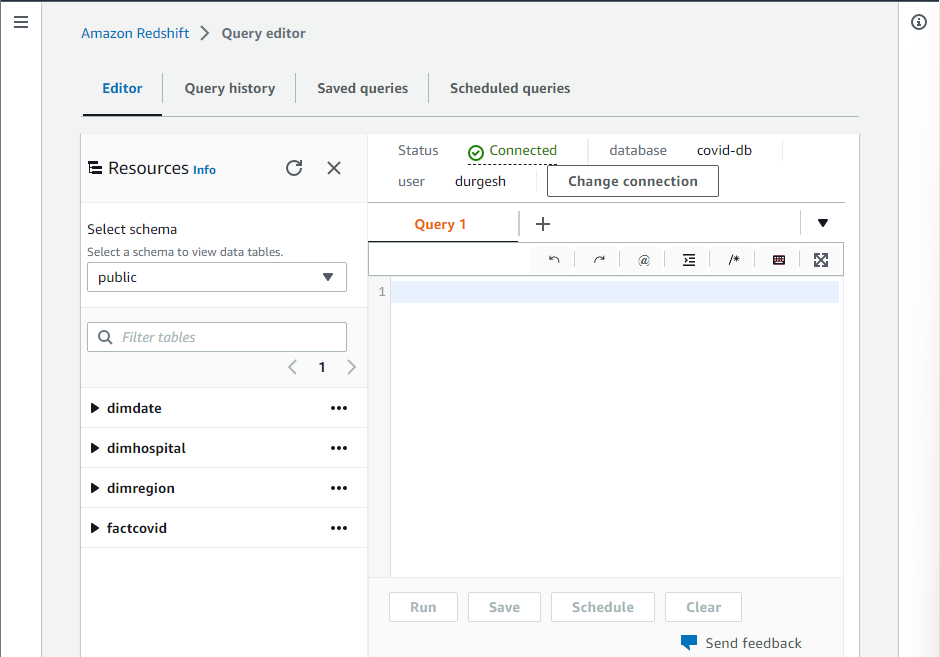

<body>
    <p style ="font-weight:400;font-size:17px"><b> • You can now perform analysis on this data and expand further by connecting it with BI tools to create dashboards.</b></p>
  </body>

<footer style= "text-align: center;">
    <p>Author: Durgesh Patil<br>
    <a href="mailto:amolsp1999@gmail.com">amolsp1999@gmail.com</a></p>
</footer>